<a href="https://colab.research.google.com/github/SofiaIPalladino/AI/blob/main/Mamdani/MamdaniDocente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 2b -Mamdani docente-**

1. Un docente le solicita que automatice el proceso de puntuación de su materia. La materia consta de un único examen, puntuado entre 0 y 100, y además una nota de concepto con tres valores (regular, bueno, excelente). Diseñe un FIS Mamdani que permita modificar la nota final (1-10) combinando ambas variables de entrada.

2. Recuerde que la nota de concepto sólo modula la nota del examen. Es decir, la nota del examen tiene más peso en el resultado final que el concepto. No obstante, la nota de concepto debe influir en la puntuación final.

3. Explicite las reglas que ha elegido para esta tarea, y dé ejemplos de valores de entrada y salida. Defina los valores máximos y mínimos posibles para cada variable.

Nota final: 2.52


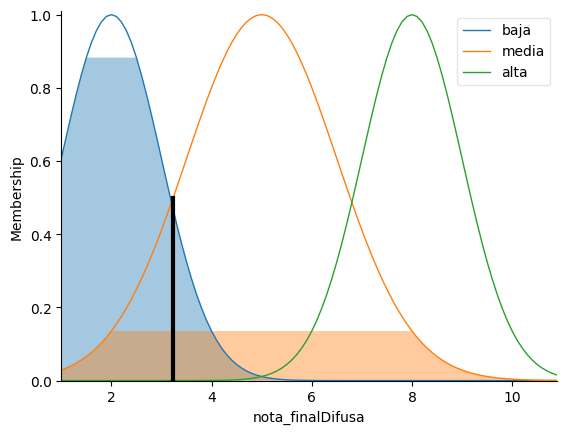

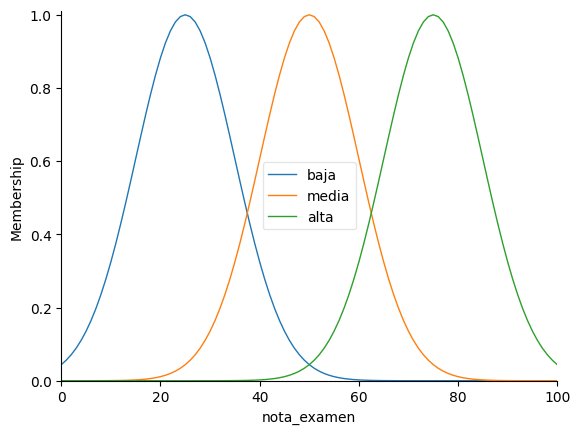

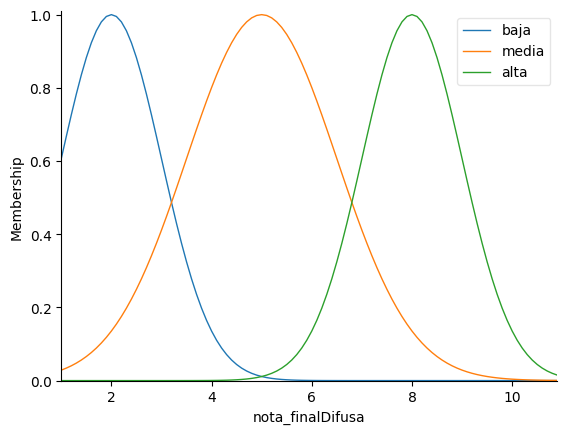

In [88]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definir las variables de entrada y salida
nota_examen = ctrl.Antecedent(np.arange(0, 101, 1), 'nota_examen')
nota_concepto = ctrl.Antecedent(np.arange(0, 3, 1), 'nota_concepto')
nota_final = ctrl.Consequent(np.arange(1, 11, 0.1), 'nota_finalDifusa')

# Definir los conjuntos difusos utilizando funciones gaussianas
nota_examen['baja'] = fuzz.gaussmf(nota_examen.universe, 25, 10)  # centro 25, desviación 10
nota_examen['media'] = fuzz.gaussmf(nota_examen.universe, 50, 10)  # centro 50, desviación 10
nota_examen['alta'] = fuzz.gaussmf(nota_examen.universe, 75, 10)  # centro 75, desviación 10

nota_concepto['bajo'] = fuzz.gaussmf(nota_concepto.universe, 0, 0.5)  # centro 0, desviación 0.5
nota_concepto['medio'] = fuzz.gaussmf(nota_concepto.universe, 1, 0.5)  # centro 1, desviación 0.5
nota_concepto['alto'] = fuzz.gaussmf(nota_concepto.universe, 2, 0.5)  # centro 2, desviación 0.5

# Definir los conjuntos de salida también con funciones gaussianas
nota_final['baja'] = fuzz.gaussmf(nota_final.universe, 2, 1)  # centro 2, desviación 1
nota_final['media'] = fuzz.gaussmf(nota_final.universe, 5, 1.5)  # centro 5, desviación 1.5
nota_final['alta'] = fuzz.gaussmf(nota_final.universe, 8, 1)  # centro 8, desviación 1

# Definir las reglas ajustadas para tener en cuenta el doble de peso en la nota del examen
reglas = [
    ctrl.Rule(nota_examen['alta'] & nota_concepto['alto'], nota_final['alta']),
    ctrl.Rule(nota_examen['alta'] & nota_concepto['medio'], nota_final['alta']),
    ctrl.Rule(nota_examen['alta'] & nota_concepto['bajo'], nota_final['media']),
    ctrl.Rule(nota_examen['media'] & nota_concepto['alto'], nota_final['alta']),
    ctrl.Rule(nota_examen['media'] & nota_concepto['medio'], nota_final['media']),
    ctrl.Rule(nota_examen['media'] & nota_concepto['bajo'], nota_final['media']),
    ctrl.Rule(nota_examen['baja'] & nota_concepto['alto'], nota_final['media']),
    ctrl.Rule(nota_examen['baja'] & nota_concepto['medio'], nota_final['baja']),
    ctrl.Rule(nota_examen['baja'] & nota_concepto['bajo'], nota_final['baja']),
]

# Crear el sistema de control
sistema_control = ctrl.ControlSystem(reglas)
simulador = ctrl.ControlSystemSimulation(sistema_control)

def calcula_nota_final(nota_examen_val, nota_concepto_val):
    simulador.input['nota_examen'] = nota_examen_val
    simulador.input['nota_concepto'] = nota_concepto_val
    simulador.compute()
    nota_fuzzy = simulador.output['nota_finalDifusa']

    # Mostrar la gráfica de salida de la nota final
    nota_final.view(sim=simulador)

    # Ajustar la nota final para darle el doble de peso a la nota de examen
    if nota_concepto_val == 0:
       return max(1, min(10, -nota_fuzzy * 0.15 + nota_examen_val * 0.1))
    else:
       return max(1, min(10, nota_fuzzy * 0.15 + nota_examen_val * 0.1))


# Ejemplos de cálculo
print(f"Nota final: {calcula_nota_final(30, 0):.2f}")


# Mostrar gráficos de las variables de entrada y salida
nota_examen.view()
nota_final.view()

# Mostrar resultados
plt.show()


In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00
